# A Study of UFO Sighting Report of USA (1910 - 2014)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from IPython.display import HTML
from matplotlib import animation
%matplotlib inline

## 1. Data preparation

In [2]:
#Read data
Location = r'C:\Users\Admin\scrubbed.csv'
ufo = pd.DataFrame(pd.read_csv(Location, header=0, usecols=[0, 1, 2, 3, 4, 5, 9, 10], low_memory=False))
#Drop report data of other countries
ufo=ufo[ufo.country.str.contains("us") == True]
#Replace 24:00 as 00:00 for datetime
ufo['datetime'] = ufo['datetime'].str.replace('24:','00:')
pd.to_datetime(ufo['datetime'], format = '%m/%d/%Y %H:%M')
#Separate date and time and create individuals columns for them
ufo['datetime'] = pd.to_datetime(ufo['datetime'])
ufo['date'] = ufo['datetime'].dt.date
ufo['time'] = ufo['datetime'].dt.time
#Separate the datetime information and create individuals columns for them
ufo['date'] = pd.to_datetime(ufo['date'], format = '%Y-%m-%d')
ufo['year'] = ufo['date'].dt.year
ufo['month'] = ufo['date'].dt.month
ufo['day_of_week'] = ufo['date'].dt.weekday_name
ufo['time_hour'] = ufo.datetime.apply(lambda x: x.hour)
#Show data
ufo.head(5)

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,date,time,year,month,day_of_week,time_hour
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,29.8830556,-97.941111,1949-10-10,20:30:00,1949,10,Monday,20
3,1956-10-10 21:00:00,edna,tx,us,circle,20,28.9783333,-96.645833,1956-10-10,21:00:00,1956,10,Wednesday,21
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,21.4180556,-157.803611,1960-10-10,20:00:00,1960,10,Monday,20
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,36.595,-82.188889,1961-10-10,19:00:00,1961,10,Tuesday,19
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,41.1175,-73.408333,1965-10-10,23:45:00,1965,10,Sunday,23


## 2. Basic analysis

In [3]:
print('State with most ufo sightings:',ufo['state'].value_counts().index[0])
print('Most commonly reported ufo shape:',ufo['shape'].value_counts().index[0])
print('Longest duration of a single sighting:',ufo['duration (seconds)'].max(),'seconds')

State with most ufo sightings: ca
Most commonly reported ufo shape: light
Longest duration of a single sighting: 994 seconds


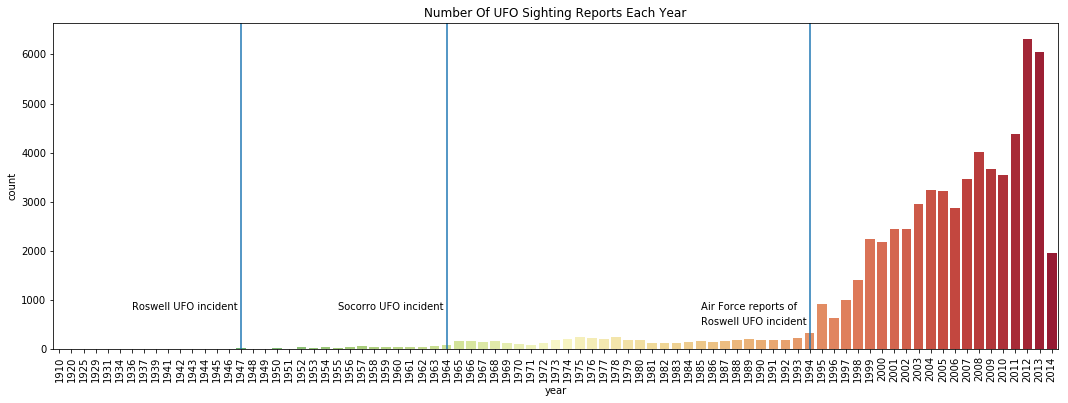

In [4]:
plt.subplots(figsize=(18,6))
sns.countplot('year',data=ufo,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.axvline(x=15)
plt.text(15.-9,800,'Roswell UFO incident',rotation=0)
plt.axvline(x=32)
plt.text(32.-9,800,'Socorro UFO incident',rotation=0)
plt.axvline(x=62)
plt.text(62.-9,800,'Air Force reports of',rotation=0)
plt.text(62.-9,500,'Roswell UFO incident',rotation=0)
plt.xticks(rotation=90)
plt.title('Number Of UFO Sighting Reports Each Year')
plt.show()

### From the figure above we could see some important events had significant influences on the ampont of reports. This trend-following phenomenon possibly proves the falsity of many sighting reports.

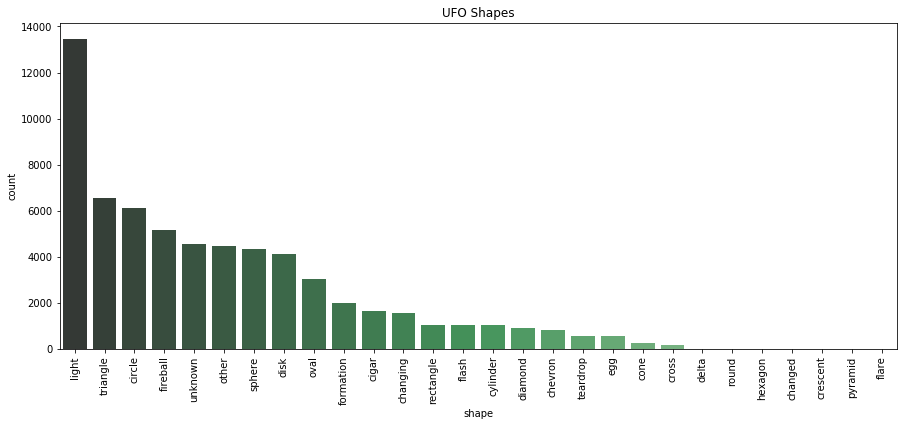

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('shape',data=ufo,palette='Greens_d',order=ufo['shape'].value_counts().index)
plt.xticks(rotation=90)
plt.title('UFO Shapes')
plt.show()

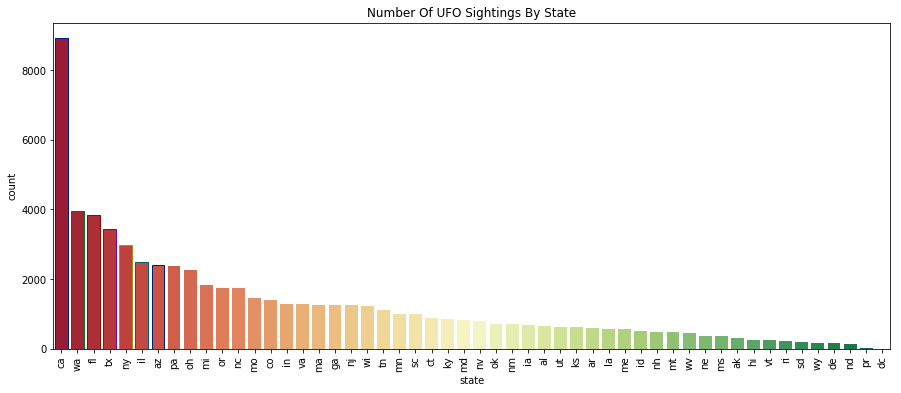

In [6]:
plt.subplots(figsize=(15,6))
sns.countplot('state',data=ufo,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=ufo['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of UFO Sightings By State')
plt.show()

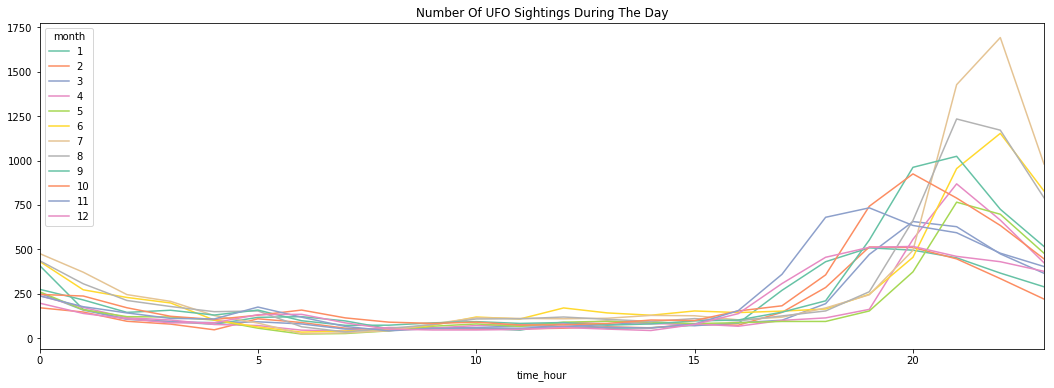

In [7]:
ufo_state=pd.crosstab(ufo.time_hour,ufo.month)
ufo_state.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Number Of UFO Sightings During The Day')
plt.show()

### UFO sightings usually happened in evening and summer.

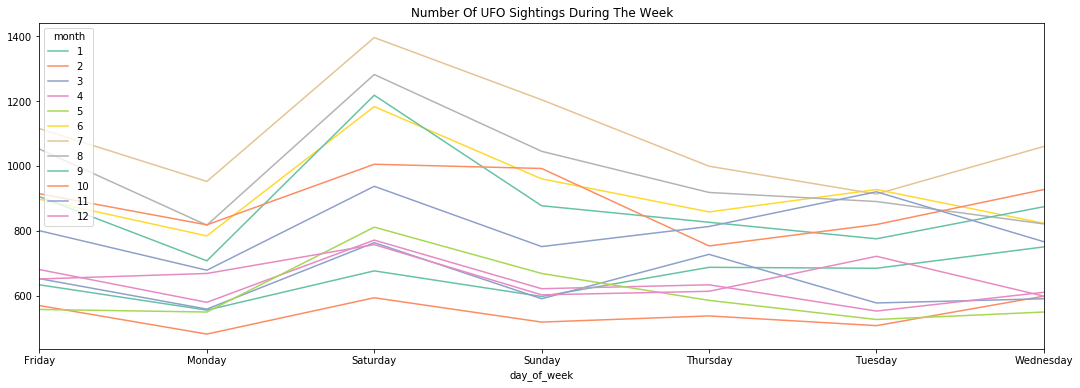

In [8]:
ufo_state=pd.crosstab(ufo.day_of_week,ufo.month)
ufo_state.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Number Of UFO Sightings During The Week')
plt.show()

### UFO sightings usually happened on weekends.

## 3. Analysis with maps

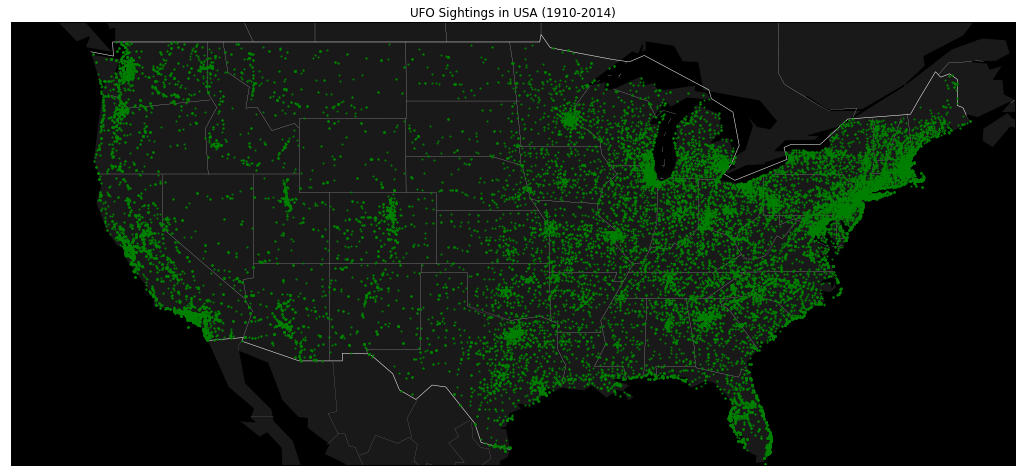

In [9]:
#Convert string into int
ufo.latitude = pd.to_numeric(ufo.latitude, errors='coerce')
ufo.longitude = pd.to_numeric(ufo.longitude, errors='coerce')

#Create map
m = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50, llcrnrlon=-130,urcrnrlon=-64,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat=list(ufo.latitude)
long=list(ufo.longitude)
x,y=m(long,lat)
m.plot(x, y,'go',markersize=1,color = 'g')

m.drawcoastlines()
m.fillcontinents(color='#191919',lake_color='#000000')
m.drawmapboundary(fill_color='#000000')
m.drawcountries(linewidth=0.5, color="w")
m.drawstates(linewidth=0.1, color="w")
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.title('UFO Sightings in USA (1910-2014)')

plt.show()

### Sight locations are concentrated in west and east coast areas and big cities.

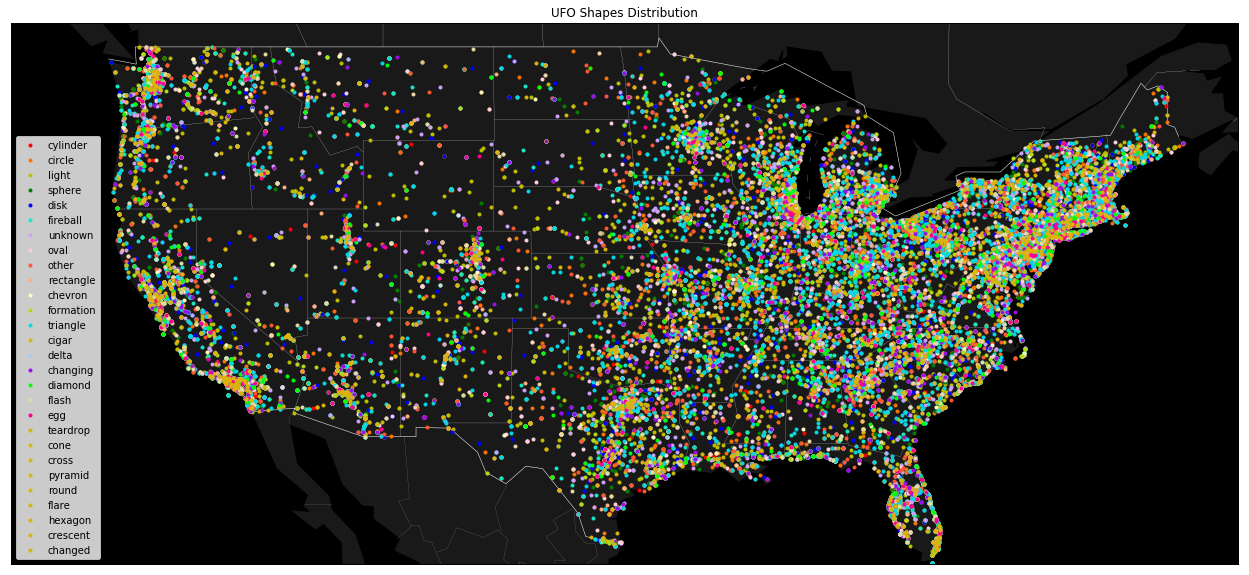

In [10]:
top_shapes=ufo[ufo['shape'].isin(ufo['shape'].value_counts()[:28].index)]
m1 = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50, llcrnrlon=-130,urcrnrlon=-64,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m1.drawcoastlines()
m1.fillcontinents(color='#191919',lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.5, color="w")
m1.drawstates(linewidth=0.1, color="w")
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','#f97306','y','g','b','#13eac9','#cea2fd','#ffcfdc','#ff5733','#ffb07c',"#ffffc2",'#b0dd16','#02d8e9','#dbb40c','#a2cffe','#9a0eea','#01ff07','#e6daa6','#ff028d','#dbb40c','#dbb40c','#dbb40c','#dbb40c','#dbb40c','#dbb40c','#dbb40c','#dbb40c','#dbb40c',]
shape=list(top_shapes['shape'].unique())
def shape_point(shape,color,label):
    lat_shape=list(top_shapes[top_shapes['shape']==shape].latitude)
    long_shape=list(top_shapes[top_shapes['shape']==shape].longitude)
    x_shape,y_shape=m1(long_shape,lat_shape)
    m1.plot(x_shape,y_shape,'go',markersize=3,color=j,label=i)
for i,j in zip(shape,colors):
    shape_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('UFO Shapes Distribution')
plt.show()

### It seems there are no obvious locational distribution of UFO shapes sighted.

In [11]:
#Create a video of UFO sightings along with year changing
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('UFO Sightings In USA '+'\n'+'Year:' +str(Year))
    m2 = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=50, llcrnrlon=-130,urcrnrlon=-64,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
    
    lat_gif=list(ufo[ufo['year']==Year].latitude)
    long_gif=list(ufo[ufo['year']==Year].longitude)
    x_gif,y_gif=m2(long_gif,lat_gif)
    m2.scatter(x_gif, y_gif,s=1 ,color ='r') 
    m2.drawcoastlines()
    m2.fillcontinents(color='#191919',lake_color='#000000')
    m2.drawmapboundary(fill_color='#000000')
    m2.drawcountries(linewidth=0.5, color="w")
    m2.drawstates(linewidth=0.1, color="w")
    
ani = animation.FuncAnimation(fig,animate,list(ufo.year.unique()), interval = 1500)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Admin\\Downloads\\ffmpeg-20171210-1215889-win64-static\\bin\\ffmpeg.exe'
mywriter = animation.FFMpegWriter(fps=1)
ani.save('animation.mp4',writer=mywriter)
plt.close()

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [12]:
#Show the video
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="animation.mp4" type="video/mp4">
</video></div>""")

# 4. Conclusion

## According to studies of various part of sighting reports, including Sighting were mostly likely to happen during summers, weekends and evenings. Amount of report grew rapidly after famous events, and to some extent this proves that a large number of sighting reports could be wrongly recognized natural things or fabricated.